<a href="https://colab.research.google.com/github/GIMMI42PIASTRATO/MNIST-Challenge-PyTorch/blob/main/MNIST_Challenge_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [21]:
class Network(nn.Module):

  def __init__(self) -> None:
    #Il metodo __init__ ci permette di creare tutti i nostri layer della nostra neural network
    super().__init__()
    #nums images 28x28 = 784 pixels
    self.input_layer = nn.Linear(786, 64)
    self.hidden_layer1 = nn.Linear(64, 64)
    self.hidden_layer2 = nn.Linear(64, 64)
    self.output_layer = nn.Linear(64, 10)

    def forward(self, data):
      #Il metodo forward ci permette di definire come i dati verranno passati attraverso ogni layer
      data = F.relu(self.input_layer(data))
      data = F.relu(self.hidden_layer1(data))
      data = F.relu(self.hidden_layer2(data))
      data = self.output_layer(data)

      return F.log_softmax(data, dim=1)


In [3]:
training_data = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing_data = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 91183403.80it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21266800.18it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26081365.62it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14259377.82it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [20]:
train_set = torch.utils.data.DataLoader(dataset=training_data, batch_size=10, shuffle=True)
testing_set = torch.utils.data.DataLoader(dataset=testing_data, batch_size=10, shuffle=True)

#Instantiated the network

In [5]:
network = Network()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

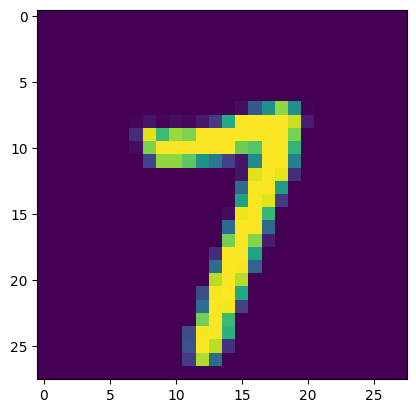

In [19]:
learning_optimizer = optim.Adam(network.parameters(), lr=0.01)
epochs = 5

for i in range(epochs):
  for data in train_set:
    image, result = data
    network.zero_grad()
    result = network(image.view(-1, 784))

    #print(image)
    #print("############################")
    #print(result)
    #plt.imshow(image[0].view(28, 28))